In [70]:
import pandas as pd

from helper import get_dataframe

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [71]:
total_data = get_dataframe(freq='daily', ticker='AMZN', size='full')

df, meta = total_data[0], total_data[1]
df.to_csv(f'{meta["2. Symbol"]}.csv', index=False)

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AMZN', '3. Last Refreshed': '2020-01-31', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [72]:
df = df.iloc[::-1].reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-31,60.38,64.75,58.44,64.56,10697900
1,2000-02-01,67.50,70.63,64.38,67.44,13404600
2,2000-02-02,67.94,72.25,67.75,69.44,14025900
3,2000-02-03,81.13,85.94,77.38,84.19,43750000
4,2000-02-04,82.75,82.75,78.00,78.56,11023000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5033 non-null   datetime64[ns]
 1   Open    5033 non-null   float64       
 2   High    5033 non-null   float64       
 3   Low     5033 non-null   float64       
 4   Close   5033 non-null   float64       
 5   Volume  5033 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 216.4 KB


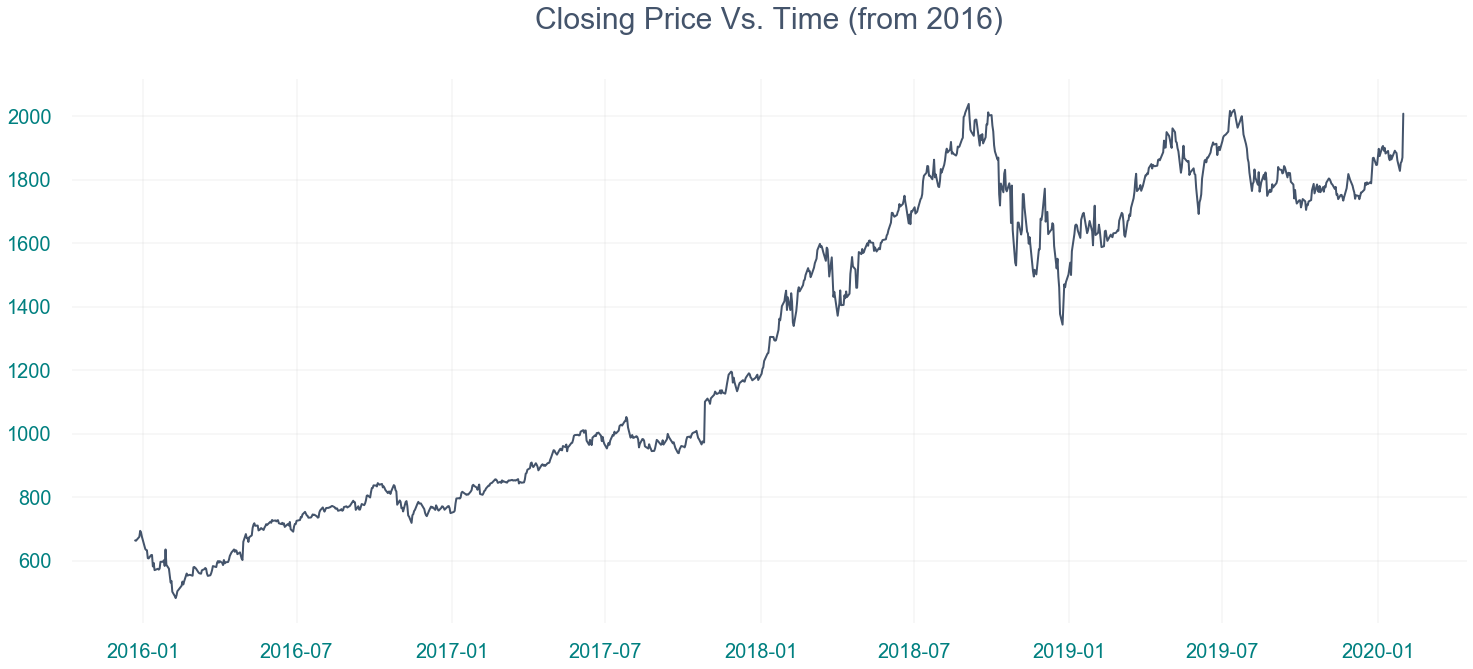

In [74]:
x = df['Date'][4000:]
y = df['Close'][4000:]

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Closing Price Vs. Time (from 2016)', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'top', 'left', 'bottom']:
    ax.spines[i].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

sns.lineplot(x, y, color='#44546B', linewidth=2, ax=ax)

plt.xlabel('')
plt.ylabel('');

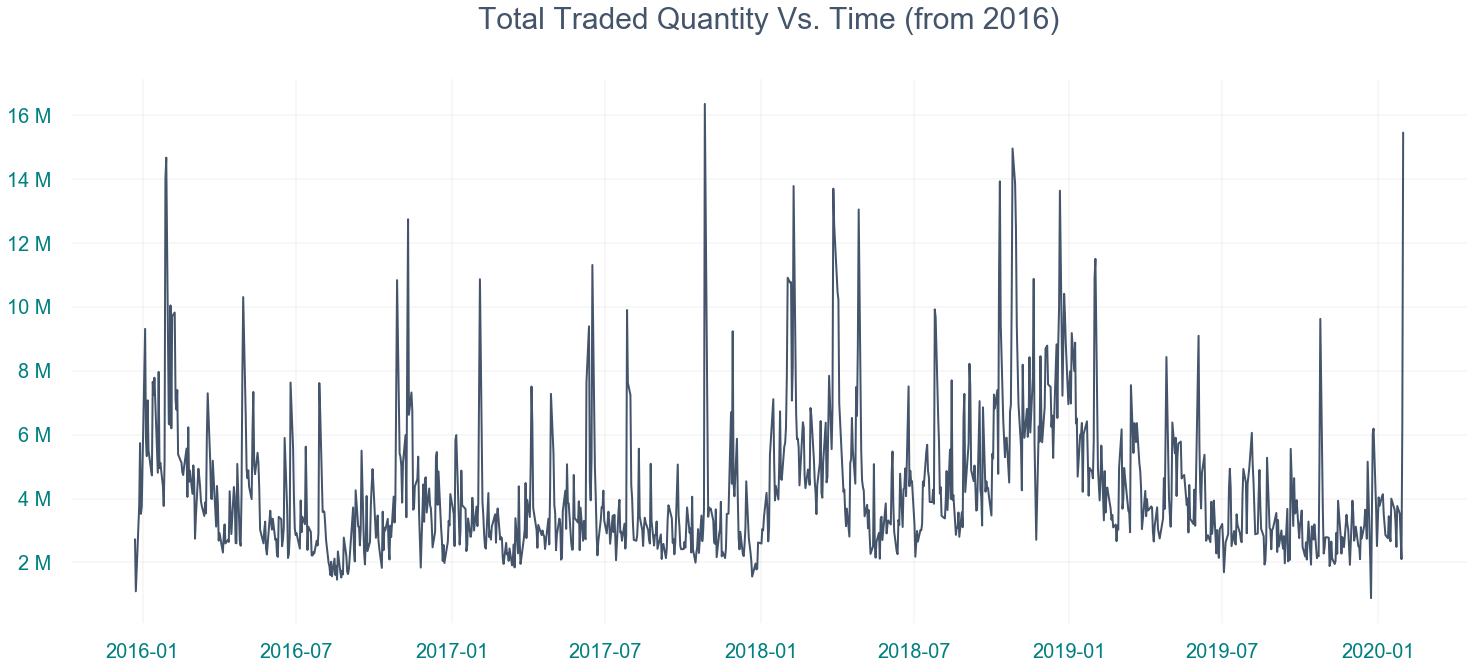

In [75]:
x = df['Date'][4000:]
y = df['Volume'][4000:]

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Total Traded Quantity Vs. Time (from 2016)', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'top', 'left', 'bottom']:
    ax.spines[i].set_visible(False)
    
plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)

def millions(x, pos):
    return '%1.0f M' % (x*1e-6)
formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
sns.lineplot(x, y, color='#44546B', linewidth=2, ax=ax)

plt.xlabel('')
plt.ylabel('');